In [29]:
# imports
import tensorflow as tf
from tensorflow import keras

import numpy as np
import pandas as pd
from sklearn.preprocessing import StandardScaler
from sklearn.utils import shuffle
import matplotlib.pyplot as plt

### Función de formación de SECUENCIAS

In [30]:
# Division of a global sequences into n_step size ones (X) with the corresponding prediction desired (y)
def split_sequence(sequence, n_steps):
    X, y = list(), list()
    for i in range(len(sequence)):
        # find the end of this pattern
        end_ix = i + n_steps
        # check if we are beyond the sequence
        if end_ix > len(sequence)-1:
            break
        # gather input and output parts of the pattern
        seq_x, seq_y = sequence[i:end_ix], sequence[end_ix]
        X.append(seq_x)
        y.append(seq_y)
    return np.array(X), np.array(y)

### Métrica: ERROR RELATIVO < MARGEN

In [31]:
# Calculates a successfull ratio using less relative error than a maximum criterium
import keras.backend as K
def porcentaje_margen(y_true, y_pred):
    margen = 0.02
    yy = K.sum(K.cast(K.less(K.abs((y_pred/y_true)-1.0), margen), dtype=float))
    return yy/K.cast(K.shape(y_pred)[0], dtype=float)


#### Load Data

In [24]:
df = pd.read_excel('historica Iberdrola DIC 16-19.xls')
df

,Fecha,Último
0,29-nov-2019,8.928
1,28-nov-2019,8.916
2,27-nov-2019,8.928
3,26-nov-2019,8.896
4,25-nov-2019,8.898
...,...,...
735,07-dic-2016,5.729
736,06-dic-2016,5.775
737,05-dic-2016,5.581
738,02-dic-2016,5.599


#### Preprocesar los datos

In [34]:
data = df['Último'].values
scalar = StandardScaler()
data_std = scalar.fit_transform(data.reshape((-1,1)))

In [36]:
# Dividir la secuencia global en secuencias de 20 muestras
X,y = split_sequence(data_std, 20)
X.shape, y.shape

((720, 20, 1), (720, 1))

In [44]:
# Obtenemos los conjuntos de entrenamiento y test
permu = shuffle(np.arange(720), random_state=0)

# indices train (2/3 de los datos)
indx_train = permu[:480]
# indices test (1/3 de los datos)
indx_test = permu[480:]

indx_train.shape, indx_test.shape

((480,), (240,))

#### Train - Test

In [46]:
X_train, y_train = X[indx_train], y[indx_train]
X_test, y_test = X[indx_test], y[indx_test]

X_train.shape, y_train.shape, X_test.shape, y_test.shape

((480, 20, 1), (480, 1), (240, 20, 1), (240, 1))

### Creacion Modelos

In [54]:
model1 = keras.Sequential([
    keras.layers.SimpleRNN(10, activation='relu', return_sequences=True, input_shape=(20,1)),
    keras.layers.SimpleRNN(5, activation='relu', return_sequences=False),
    keras.layers.Dense(1) # Regresion
])

model1.compile(
    optimizer='adam',
    loss='mse',
    metrics=[porcentaje_margen]
)

In [55]:
# Entrenamiento red
history1 = model1.fit(X_train, y_train, epochs=20, validation_data=(X_test, y_test))

Epoch 1/20
15/15 [==============================] - 1s 28ms/step - loss: 1.8589 - porcentaje_margen: 0.0000e+00 - val_loss: 1.5877 - val_porcentaje_margen: 0.0000e+00
Epoch 2/20
15/15 [==============================] - 0s 10ms/step - loss: 1.2237 - porcentaje_margen: 0.0000e+00 - val_loss: 0.9284 - val_porcentaje_margen: 0.0000e+00
Epoch 3/20
15/15 [==============================] - 0s 8ms/step - loss: 0.7786 - porcentaje_margen: 0.0021 - val_loss: 0.6686 - val_porcentaje_margen: 0.0195
Epoch 4/20
15/15 [==============================] - 0s 7ms/step - loss: 0.5968 - porcentaje_margen: 0.0104 - val_loss: 0.5398 - val_porcentaje_margen: 0.0469
Epoch 5/20
15/15 [==============================] - 0s 7ms/step - loss: 0.4931 - porcentaje_margen: 0.0354 - val_loss: 0.4569 - val_porcentaje_margen: 0.0352
Epoch 6/20
15/15 [==============================] - 0s 7ms/step - loss: 0.4203 - porcentaje_margen: 0.0312 - val_loss: 0.4004 - val_porcentaje_margen: 0.0469
Epoch 7/20
15/15 [================

In [56]:
history1.history.keys()

dict_keys(['loss', 'porcentaje_margen', 'val_loss', 'val_porcentaje_margen'])

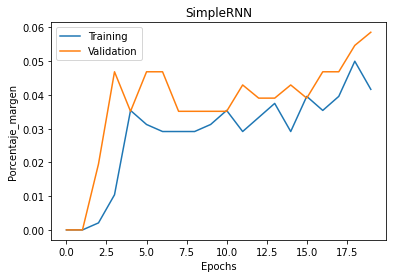

In [57]:
# Grafico
plt.figure()
plt.plot(history1.history['porcentaje_margen'])
plt.plot(history1.history['val_porcentaje_margen'])
plt.title("SimpleRNN")
plt.xlabel("Epochs")
plt.ylabel("Porcentaje_margen")
plt.legend(['Training', 'Validation'], loc="upper left")
plt.show()

### LSTM

In [58]:
lstm = keras.Sequential([
    keras.layers.LSTM(5, activation='relu', input_shape=(20,1)),
    keras.layers.Dense(1)
])

lstm.compile(
    optimizer='adam',
    loss='mse',
    metrics=[porcentaje_margen]
)

In [59]:
history2 = lstm.fit(X_train, y_train, epochs=20, validation_data=(X_test, y_test))

Epoch 1/20
15/15 [==============================] - 1s 19ms/step - loss: 0.9853 - porcentaje_margen: 0.0000e+00 - val_loss: 0.9451 - val_porcentaje_margen: 0.0039
Epoch 2/20
15/15 [==============================] - 0s 7ms/step - loss: 0.8265 - porcentaje_margen: 0.0000e+00 - val_loss: 0.7808 - val_porcentaje_margen: 0.0000e+00
Epoch 3/20
15/15 [==============================] - 0s 8ms/step - loss: 0.6691 - porcentaje_margen: 0.0021 - val_loss: 0.5988 - val_porcentaje_margen: 0.0000e+00
Epoch 4/20
15/15 [==============================] - 0s 7ms/step - loss: 0.5015 - porcentaje_margen: 0.0104 - val_loss: 0.4485 - val_porcentaje_margen: 0.0039
Epoch 5/20
15/15 [==============================] - 0s 7ms/step - loss: 0.4275 - porcentaje_margen: 0.0292 - val_loss: 0.4080 - val_porcentaje_margen: 0.0469
Epoch 6/20
15/15 [==============================] - 0s 9ms/step - loss: 0.3858 - porcentaje_margen: 0.0167 - val_loss: 0.3779 - val_porcentaje_margen: 0.0156
Epoch 7/20
15/15 [=================

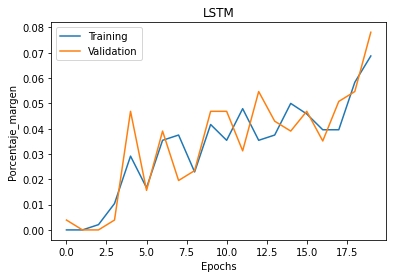

In [61]:
# Grafico
plt.figure()
plt.plot(history2.history['porcentaje_margen'])
plt.plot(history2.history['val_porcentaje_margen'])
plt.title("LSTM")
plt.xlabel("Epochs")
plt.ylabel("Porcentaje_margen")
plt.legend(['Training', 'Validation'], loc="upper left")
plt.show()

### GRU

In [62]:
gru = keras.Sequential([
    keras.layers.GRU(5, activation='relu', input_shape=(20,1)),
    keras.layers.Dense(1)
])

gru.compile(
    optimizer='adam',
    loss='mse', 
    metrics=[porcentaje_margen]
)

In [63]:
history3 = gru.fit(X_train, y_train, epochs=20, validation_data=(X_test, y_test))

Epoch 1/20
15/15 [==============================] - 1s 18ms/step - loss: 1.5813 - porcentaje_margen: 0.0000e+00 - val_loss: 1.5682 - val_porcentaje_margen: 0.0000e+00
Epoch 2/20
15/15 [==============================] - 0s 7ms/step - loss: 1.3938 - porcentaje_margen: 0.0000e+00 - val_loss: 1.3952 - val_porcentaje_margen: 0.0000e+00
Epoch 3/20
15/15 [==============================] - 0s 8ms/step - loss: 1.2315 - porcentaje_margen: 0.0000e+00 - val_loss: 1.2482 - val_porcentaje_margen: 0.0000e+00
Epoch 4/20
15/15 [==============================] - 0s 7ms/step - loss: 1.0938 - porcentaje_margen: 0.0021 - val_loss: 1.1215 - val_porcentaje_margen: 0.0000e+00
Epoch 5/20
15/15 [==============================] - 0s 9ms/step - loss: 0.9794 - porcentaje_margen: 0.0042 - val_loss: 1.0074 - val_porcentaje_margen: 0.0000e+00
Epoch 6/20
15/15 [==============================] - 0s 8ms/step - loss: 0.8775 - porcentaje_margen: 0.0000e+00 - val_loss: 0.9063 - val_porcentaje_margen: 0.0000e+00
Epoch 7/20


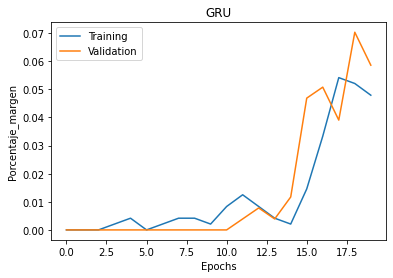

In [64]:
# Grafico
plt.figure()
plt.plot(history3.history['porcentaje_margen'])
plt.plot(history3.history['val_porcentaje_margen'])
plt.title("GRU")
plt.xlabel("Epochs")
plt.ylabel("Porcentaje_margen")
plt.legend(['Training', 'Validation'], loc="upper left")
plt.show()